# Data Analysis
Performing initial understanding analysis of all three datasets for the Kaggle ML Titanic competition. Using this competition to explore applying: 
- ML Modelling
- Statistics
- Python

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in each dataset
gender_submission_df = pd.read_csv("../data/gender_submission.csv")
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

## Gender Submission Dataset
A deep dive into the gender submission dataset.

In [3]:
# Look at the head of the dataset
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
# Look at the shape of the dataset
gender_submission_df.shape

(418, 2)

The gender submission dataset has the following properties:
- 2 attributes = Passenger ID, Survived
- Passenger ID identifies passengers uniquely
- Survived is a binary value (0 = non survivors, 1 = survivors)
- Total of 418 rows

## Train and Test Dataset
Both train and test are identical datasets that will require a deep dive.

In [5]:
# Look at the head of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Look at the head of the dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Look at the shape of the dataset
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


From the above, we can deduce the following:
- Train and Test datasets are identical with the exception of one attribute missing (Survived)
- We can also see that gender_submission data is the survived column for the test dataset
- The train and test is split up into 891 and 418 (68% and 32%) split of data
- Besides Passenger ID and Survived, there rae 10 attributes for both of the datasets
- These are:
    - Pclass (Ticket Class: 1 = 1st, 2 = 2nd, 3 = 3rd)
    - Name 
    - Sex
    - Age
    - SibSp (Number of siblings/spouses aboard the titanic)
    - Parch (Number of parents/children aboard the titanic)
    - Ticket (Ticket number)
    - Fare (Passenger fare)
    - Cabin (Cabin number)
    - Embarked (Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton)
    
Looking at the competition details, there are the following noteable details for the attributes:
- pclass is a proxy for socio-economic status: 1st = Upper, 2nd = Middle, 3rd = Lower
- age is fractional if < 1 and xx.5 format if estimated
- sibsp notes that siblings/spouses are defined in the following way: siblings = bro, sis, stepbro, stepsis & spouses = husband, wife (misstresses and fiances are ignored)
- parch notes that parent/children are defined in the following way: Parent = mother, father & Child = daughter, son, stepdaughter, stepson (some children who travelled with nanny have parch = 0)

My initial thoughts
- Some attributes will have some correlation with the feature of interest (Survived)
- Some attributes may overlap (e.g. Fare price may also be a proxy for SES)

## Investigating Attributes
Looking at correlation between attributes and the feature to gauge what might be intersting features to look at. Furthermore, will look at the correlation between attributes as well to see what might have an overlap. Ask the question: what might be driving this trend

In [8]:
# Looking at the dataframes current data types
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Survived, Pclass, Sex, Embarked, Cabin would all make sense as a category
for col in ["Survived", "Pclass", "Sex", "Embarked"]:
    train_df[col] = train_df[col].astype("category")
    
# PassengerId would not be necessary for modelling purposes
if "PassengerId" in train_df.columns:
    train_df = train_df.drop("PassengerId", axis = 1)

In [10]:
train_df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object

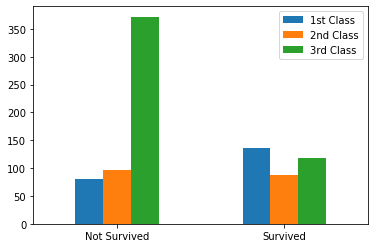

In [21]:
# Pclass vs Survived
df = train_df.groupby("Survived")
index = ["Not Survived", "Survived"]
class1 = []
class2 = []
class3 = []
for i, frame in df:
    class1.append(frame[frame["Pclass"] == 1].shape[0])
    class2.append(frame[frame["Pclass"] == 2].shape[0])
    class3.append(frame[frame["Pclass"] == 3].shape[0])
df2 = pd.DataFrame({"1st Class": class1,
                    "2nd Class": class2,
                    "3rd Class": class3}, index=index)
ax = df2.plot.bar(rot=0)

If we were to do a univariate analysis, we could probably infer the following from the above:
- If we were to randomly sample a person from 3rd class then they are more likely to have not survived
- If we were to randomly sample a person from 2nd class then they are pretty evenly distributed between not survived and survived
- If we were to randomly sample a person from 1st class then they are more likely to have survived

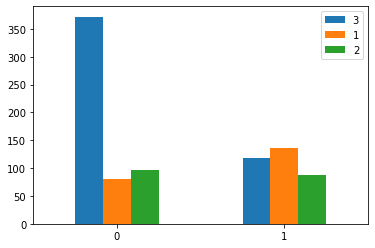

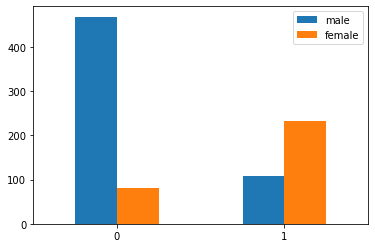

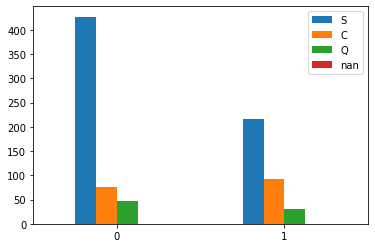

In [51]:
# Generalise the above to work for all categorical
categorical_variables = ["Pclass", "Sex", "Embarked"]
df = train_df.groupby("Survived")
index = ["Not Survived", "Survived"]
for var in categorical_variables:
    var_dict = {}
    for category in train_df[var].unique():
        var_dict[category] = []
        for i, frame in df:
            var_dict[category].append(frame[frame[var] == category].shape[0])
    df2 = pd.DataFrame.from_dict(var_dict)
    ax = df2.plot.bar(rot = 0)

0


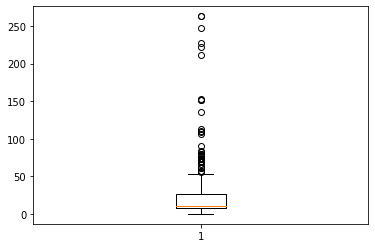

1


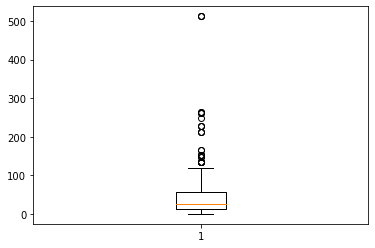

In [56]:
# Visualise continuous variables against the
index = ["Not Survived", "Survived"]
for i, frame in df:
    print(i)
    plt.boxplot(frame["Fare"])
    plt.show()

In [57]:
train_df.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [41]:
a[1]

[1, 0]